# Practice Session 01+02: Data preparation

In this practice, which spans two sessions, we will dig down into the basic data mining techniques to have a clear understanding of a dataset and prepare the data as a first stage of a Data Mining project. This process is known as **Data Preparation** or **Data Wrangling**.

The contents of this session are:

0) Preliminaries: <br>
- Dataset explanation
- Load dataset<br>
- Libraries imports<br>

1) Exploratory Data Analysis

- Calculate basis statistics as mean, median, variance, maximum and minimum <br>
- Draw the box plot and identify outliers<br>
- Calculate correlations between variables<br>

2) Feature engineering:

- Deal with missing values<br>
- Standardize all numerical columns<br>
- Convert categorical columns to dummy binary variables<br>
- Date and period management<br>
- Feature generation<br>


# 0. Preliminaries

## 0.1. Dataset

The dataset, contained in `device_db.csv` is a 10000 registers of mobile device purchases in a telco company. **Each record in the dataset describes a customer that buys a new mobile telephone**. The attributes are defined as follows:
 
0. PURCHASED_DEVICE: the mobile phone bought by the customer
1. DEVICE_VALUE: the cost of the mobile phone bought by the customer
2. LAST_DEVICE_DATE: the date of the previous mobile device purchase
3. DATA_TRAFFIC_MONTH_(1..6): The Mbps of data traffic in the month (-1...-6) used by the customer previous to the mobile device purchase
4. VOICE_TRAFFIC_MONTH_(1..6): The minutes of voice traffic in the month (-1...-6) used by the customer previous to the mobile device purchase
5. BILLING_MONTH_(1..6): Billing (USD) in the month (-1...-6) paid by the customer previous to the mobile device purchase
6. DEVICE_COST_MONTH_(1..6): Monthly cost (USD) associated to the mobile device finance in the month (-1...-6) paid by the customer previous to the mobile device purchase: proportion of owner-occupied units built prior to 1940
7. LINE_ACTIVATION_DATE: Date of the activation of the mobile line by the customer
8. MONTHS_LAST_DEVICE: Number of months of the previous mobile device
9. DURATION_LINE: Number of months since the customer contracted the mobile line
10. PREVIOUS_DEVICE_MODEL: Model of the previous mobile phone
11. PREVIOUS_DEVICE_BRAND: Brand of the previous mobile phone

This dataset will be used in next practices as recommendation engines.

## 0.2. Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from datetime import date
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## 0.3. Load the data

Open the csv with separator "," and assign to a dataframe variable (use read_csv from Pandas library)

In [2]:
input_dataset = pd.read_csv("Datasets/device_db.csv", sep=",")

# 1. Exploratory data analysis 


Exploratory Data Analysis (EDA) allows to us to have an understanding of the dataset from a stadistics perspective, i.e. data distribution and correlation between variables. This is crucial to select the most valuable variables.

[**REPORT**] Create a table with the header and first 5 rows.

In [81]:
print('Overview of the Data:')
input_dataset.head()

Overview of the Data:


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


[**REPORT**] Describe the dimension of the dataset (number of rows and columns) and the type of the given variables (float, string, integer, etc.).

In [4]:
print('This dataset has the following shape:', input_dataset.shape)
print('Every variable is of the following type:\n', input_dataset.dtypes)

This dataset has the following shape: (10000, 33)
Every variable is of the following type:
 PURCHASED_DEVICE          object
DEVICE_VALUE             float64
LAST_DEVICE_CHANGE       float64
DATA_TRAFFIC_MONTH_1     float64
DATA_TRAFFIC_MONTH_2     float64
DATA_TRAFFIC_MONTH_3     float64
DATA_TRAFFIC_MONTH_4     float64
DATA_TRAFFIC_MONTH_5     float64
DATA_TRAFFIC_MONTH_6     float64
VOICE_TRAFFIC_MONTH_1    float64
VOICE_TRAFFIC_MONTH_2    float64
VOICE_TRAFFIC_MONTH_3    float64
VOICE_TRAFFIC_MONTH_4    float64
VOICE_TRAFFIC_MONTH_5    float64
VOICE_TRAFFIC_MONTH_6    float64
BILLING_MONTH_1          float64
BILLING_MONTH_2          float64
BILLING_MONTH_3          float64
BILLING_MONTH_4          float64
BILLING_MONTH_5          float64
BILLING_MONTH_6          float64
DEVICE_COST_MONTH_1      float64
DEVICE_COST_MONTH_2      float64
DEVICE_COST_MONTH_3      float64
DEVICE_COST_MONTH_4      float64
DEVICE_COST_MONTH_5      float64
DEVICE_COST_MONTH_6      float64
LINE_ACTIVATION_D

[**REPORT**] List all columns that have at least one *NaN* value.

Tip: Use the [isna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) function, as explained, e.g., [here](https://medium.com/dunder-data/finding-the-percentage-of-missing-values-in-a-pandas-dataframe-a04fa00f84ab).

In [5]:
separator = ',\n' #For the pretty print
columns_with_Nan = input_dataset.isna().any()
filter_dataset = input_dataset.columns[columns_with_Nan]
pretty_printed_filtered_dataset = separator.join(filter_dataset.tolist())

print('The following columns has at least one NaN value: \n', pretty_printed_filtered_dataset)

The following columns has at least one NaN value: 
 PURCHASED_DEVICE,
DEVICE_VALUE,
LAST_DEVICE_CHANGE,
DATA_TRAFFIC_MONTH_1,
DATA_TRAFFIC_MONTH_2,
DATA_TRAFFIC_MONTH_3,
DATA_TRAFFIC_MONTH_4,
DATA_TRAFFIC_MONTH_5,
DATA_TRAFFIC_MONTH_6,
VOICE_TRAFFIC_MONTH_1,
VOICE_TRAFFIC_MONTH_2,
VOICE_TRAFFIC_MONTH_3,
VOICE_TRAFFIC_MONTH_4,
VOICE_TRAFFIC_MONTH_5,
VOICE_TRAFFIC_MONTH_6,
BILLING_MONTH_1,
BILLING_MONTH_2,
BILLING_MONTH_3,
BILLING_MONTH_4,
BILLING_MONTH_5,
BILLING_MONTH_6,
DEVICE_COST_MONTH_1,
DEVICE_COST_MONTH_2,
DEVICE_COST_MONTH_3,
DEVICE_COST_MONTH_4,
DEVICE_COST_MONTH_5,
DEVICE_COST_MONTH_6,
LINE_ACTIVATION_DATE,
MONTHS_LAST_DEVICE,
DURATION_LINE,
PREVIOUS_DEVICE_MODEL,
PREVIOUS_DEVICE_MANUF,
PREVIOUS_DEVICE_BRAND


[**REPORT**] Create a table with statistics including: [mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html), [median](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html), [standard deviation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html), [maximum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html) and [minimum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html) of each numeric (e.g., *type=float64*) variable.

To iterate through the columns of dataframe `df`, you can use `for column_name in df.columns`. To determine the data type of a column, you can use `df[column_name].dtype`.

In [6]:
#Option 1 (Using describe)
statistics1 = input_dataset.describe().drop('count 25% 75%'.split())
statistics1.rename(index={'50%': 'median'}, inplace= True)

#Option 2 (Using for column_name in input_data.columns)
statistics2 = pd.DataFrame(columns=input_dataset.columns, index='mean std min median max'.split())
for column_name in input_dataset.columns:
    if str(input_dataset[column_name].dtype) == 'float64':
        statistics2[column_name] ['mean'] = input_dataset[column_name].mean()
        statistics2[column_name]['std'] = input_dataset[column_name].std()
        statistics2[column_name]['min'] = input_dataset[column_name].min()
        statistics2[column_name]['median'] = input_dataset[column_name].median()
        statistics2[column_name]['max'] = input_dataset[column_name].max()
        
statistics2.dropna(axis=1,inplace=True)
display(statistics2)    

,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_2,...,BILLING_MONTH_6,DEVICE_COST_MONTH_1,DEVICE_COST_MONTH_2,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE
mean,750.484,2.0167e+07,3481.83,3649.96,3653.43,3269.44,3673.37,3427.69,154.852,142.568,...,102.268,10.8078,10.5873,11.7133,11.5544,12.5109,12.979,2.01361e+07,25.3383,62.3683
std,979.71,10925.8,6364.54,6444.36,6382.6,5675.55,6589.4,5885.42,218.251,200.574,...,65.4595,75.8346,36.996,44.4326,34.176,38.8757,39.528,43469.6,12.8174,52.0729
min,15,2.0121e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.99208e+07,-5,0
median,393,2.01706e+07,1208.73,1294.95,1310.67,1176.54,1287.09,1277.12,84.05,74.9,...,94.99,0,0,0,0,0,0,2.01503e+07,22,48
max,9057,2.01905e+07,127018,111949,111949,87856.4,121835,90550.6,4220.1,3132.1,...,1187.3,6440,1360,2466,455,1258,1000,2.01904e+07,78,320


[**REPORT**] Compare the previous results for **DEVICE_VALUE**, **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1**, **BILLING_MONTH_1**, **DEVICE_COST_MONTH_1**, **MONTHS_LAST_DEVICE** and **DURATION_LINE**  with the ones from the [scipy.stats.describe](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html) function.

In [7]:
selected_columns = 'DEVICE_VALUE DATA_TRAFFIC_MONTH_1 VOICE_TRAFFIC_MONTH_1 BILLING_MONTH_1 DEVICE_COST_MONTH_1 MONTHS_LAST_DEVICE DURATION_LINE'.split()
display(statistics1[selected_columns])
display(statistics2[selected_columns])

,DEVICE_VALUE,DATA_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_1,BILLING_MONTH_1,DEVICE_COST_MONTH_1,MONTHS_LAST_DEVICE,DURATION_LINE
mean,750.484211,3481.825663,154.852210,102.344564,10.807785,25.338323,62.368341
std,979.710272,6364.542706,218.250590,67.787155,75.834602,12.817354,52.072895
min,15.000000,0.000000,0.000000,-128.010000,0.000000,-5.000000,0.000000
median,393.000000,1208.728050,84.049999,94.990000,0.000000,22.000000,48.000000
max,9057.000000,127017.590000,4220.100100,1569.100000,6440.000000,78.000000,320.000000


,DEVICE_VALUE,DATA_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_1,BILLING_MONTH_1,DEVICE_COST_MONTH_1,MONTHS_LAST_DEVICE,DURATION_LINE
mean,750.484,3481.83,154.852,102.345,10.8078,25.3383,62.3683
std,979.71,6364.54,218.251,67.7872,75.8346,12.8174,52.0729
min,15,0,0,-128.01,0,-5,0
median,393,1208.73,84.05,94.99,0,22,48
max,9057,127018,4220.1,1569.1,6440,78,320


[**REPORT**] Generate two tables, one with a census of *PURCHASED_DEVICE* and one with a census of *PREVIOUS_DEVICE_MODEL*. A "census" is a table that includes, for each possible value of a variable, how many rows have that value.

In [8]:
print('Census of PURCHASED_DEVICE:\n', input_dataset['PURCHASED_DEVICE'].value_counts().head(15))
print('Census of PREVIOUS_DEVICE_MODEL:\n',input_dataset['PREVIOUS_DEVICE_MODEL'].value_counts().head(15))

Census of PURCHASED_DEVICE:
 TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P1769/07    5379
TGLG29462000_LG X410BCW SMARTPHONE PRETO PPB/P1769/07     451
TGAL03462000_ALCATEL 5033J SMART PRETO                    353
TGSA32162007_SAMSUNG J610G SMART PRETO PPB/PI107/04       255
TGSA31962007_SAMSUNG J410G SMART PRETO PPB/PI107/04       223
TGMO36912000_MOTOROLA XT1955 SMARTPHONE AZUL NAVY         197
TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO             194
TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO            190
TGSA31964007_SAMSUNG J410G SMART PRETO PPB/PI324/14       174
TGMO362C2000_MOTOROLA XT1944 SMARTPHONE PLATINUM          165
TGSA32064000_SAMSUNG J415G SMART PRETO PPB/PI324/14       157
TGMO37012000_MOTOROLA XT1952 SMARTPHONE INDIGO            157
TGAL03267000_ALCATEL 4034E SMARTPHONE PIXI4-4  PRETO      113
TGSA32562007_SAMSUNG J260M SMART PRETO  PPB/PI107/04      113
DGAP067C2007_APPLE IPHONE 8 64GB CINZA  PPB/PI643/10      110
Name: PURCHASED_DEVICE, dtype: int64
Cens

# 2. Feature engineering

## 2.1. Missing values management

The way nulls is managed varies according to the meaning of each variable. In some occasions, records should be removed, completed with values from other columns or somehow calculated.

[**CODE**] Eliminate all rows that have a *NaN* value in the column **PURCHASED_DEVICE**, **DEVICE_VALUE**, **LINE_ACTIVATION_DATE**, **PREVIOUS_DEVICE_MODEL** or **PREVIOUS_DEVICE_BRAND**. 

In [9]:
print('Shape before removal:', input_dataset.shape)
selected_columns = 'PURCHASED_DEVICE DEVICE_VALUE LINE_ACTIVATION_DATE PREVIOUS_DEVICE_MODEL PREVIOUS_DEVICE_BRAND'.split()
cleaned_df = input_dataset.dropna(subset=selected_columns)
print('Shape after removal:', cleaned_df.shape)

Shape before removal: (10000, 33)
Shape after removal: (5520, 33)


[**CODE**] Assign 0 to *Nan* values in the columns **DATA\_TRAFFIC\_MONTH\_(1..6)**, **VOICE\_TRAFFIC\_MONTH\_(1..6)**, **BILLING\_MONTH\_(1..6)** and **DEVICE\_COST\_MONTH\_(1..6)**.

In [10]:
selected_columns = 'DATA_TRAFFIC_MONTH_1 DATA_TRAFFIC_MONTH_2 DATA_TRAFFIC_MONTH_3 DATA_TRAFFIC_MONTH_4 DATA_TRAFFIC_MONTH_5 DATA_TRAFFIC_MONTH_6 VOICE_TRAFFIC_MONTH_1 VOICE_TRAFFIC_MONTH_2 VOICE_TRAFFIC_MONTH_3 VOICE_TRAFFIC_MONTH_4 VOICE_TRAFFIC_MONTH_5 VOICE_TRAFFIC_MONTH_6 BILLING_MONTH_1 BILLING_MONTH_2 BILLING_MONTH_3 BILLING_MONTH_4 BILLING_MONTH_5 BILLING_MONTH_6 DEVICE_COST_MONTH_1 DEVICE_COST_MONTH_2 DEVICE_COST_MONTH_3 DEVICE_COST_MONTH_4 DEVICE_COST_MONTH_5 DEVICE_COST_MONTH_6'.split()
for item in selected_columns:
    cleaned_df[item].fillna(value=0, inplace=True)
cleaned_df.shape #Check that we haven't deleted any column or row in the process

(5520, 33)

[**CODE**] Assign **LINE_ACTIVATION_DATE** value to the **LAST_DEVICE_CHANGE** in all cases in which the latter is *NaN*.

In [11]:
print('CHANGING NaN FOR LAST DEVICE CHANGE:\n', cleaned_df['LAST_DEVICE_CHANGE'].fillna(value=cleaned_df['LINE_ACTIVATION_DATE'], inplace=True), '\n')
cleaned_df.shape #Check that we haven't deleted any column or row in the process

CHANGING NaN FOR LAST DEVICE CHANGE:
 None 



(5520, 33)

[**REPORT**] Create a table with the header and first 5 rows after the previous transformations.

In [12]:
cleaned_df.head()

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,20041220.0,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,20040412.0,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


[**REPORT**] Describe the dimension of the new dataset (number of rows and columns). List all columns containing *NaN* values.

In [13]:
print('Dimensions of the Dataframe:', cleaned_df.shape)
print('Columns with NaN values:\n' ,cleaned_df.columns[cleaned_df.isna().any()].tolist())

Dimensions of the Dataframe: (5520, 33)
Columns with NaN values:
 ['MONTHS_LAST_DEVICE']


[**REPORT**] Plot a histogram of each of **DEVICE_VALUE**, **DATA_TRAFFIC_MONTH_1-3**, **VOICE_TRAFFIC_MONTH_1-3**, **BILLING_MONTH_1-3**, **DEVICE_COST_MONTH_1-3**, **DURATION_LINE**,   . Can you recognize any specific distribution (exponential, bimodal...)?

Tip: use [seaborn.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) with `kde=False` to create a histogram.

In [14]:
selected_columns = "DEVICE_VALUE DATA_TRAFFIC_MONTH_1 DATA_TRAFFIC_MONTH_2 DATA_TRAFFIC_MONTH_3 VOICE_TRAFFIC_MONTH_1 VOICE_TRAFFIC_MONTH_2 VOICE_TRAFFIC_MONTH_3 BILLING_MONTH_1 BILLING_MONTH_2 BILLING_MONTH_3 DEVICE_COST_MONTH_1 DEVICE_COST_MONTH_2 DEVICE_COST_MONTH_3 DURATION_LINE".split()

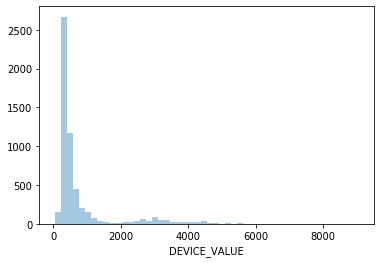

In [15]:
sns.distplot(cleaned_df[selected_columns[0]], kde=False)

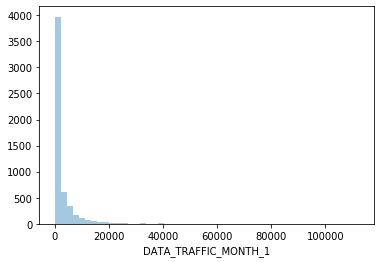

In [16]:
sns.distplot(cleaned_df[selected_columns[1]], kde=False)

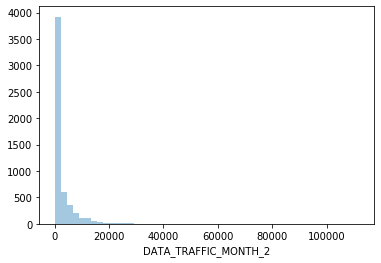

In [17]:
sns.distplot(cleaned_df[selected_columns[2]], kde=False)

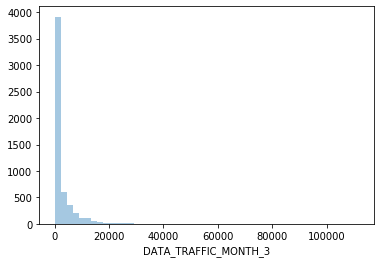

In [18]:
sns.distplot(cleaned_df[selected_columns[3]], kde=False)

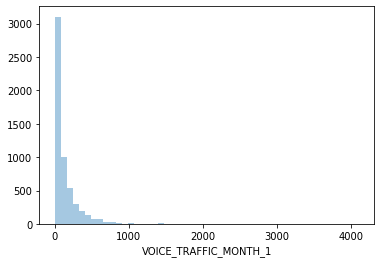

In [19]:
sns.distplot(cleaned_df[selected_columns[4]], kde=False)

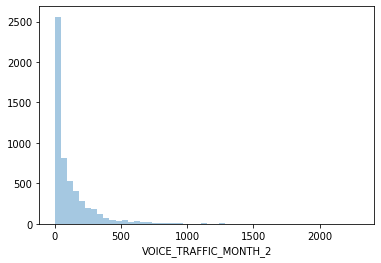

In [20]:
sns.distplot(cleaned_df[selected_columns[5]], kde=False)

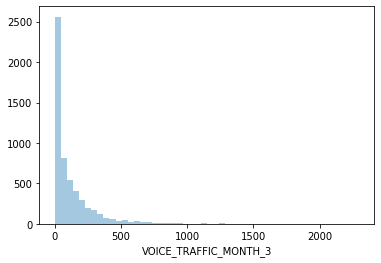

In [21]:
sns.distplot(cleaned_df[selected_columns[6]], kde=False)

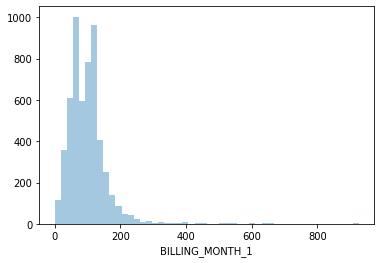

In [22]:
sns.distplot(cleaned_df[selected_columns[7]], kde=False)

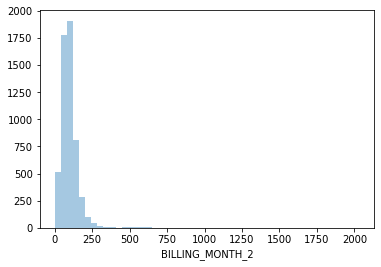

In [23]:
sns.distplot(cleaned_df[selected_columns[8]], kde=False)

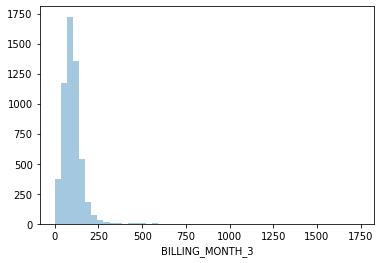

In [24]:
sns.distplot(cleaned_df[selected_columns[9]], kde=False)

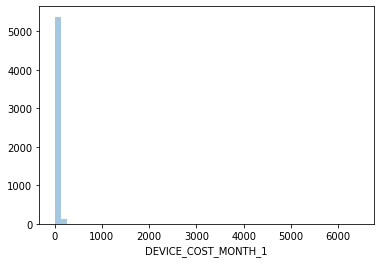

In [25]:
sns.distplot(cleaned_df[selected_columns[10]], kde=False)

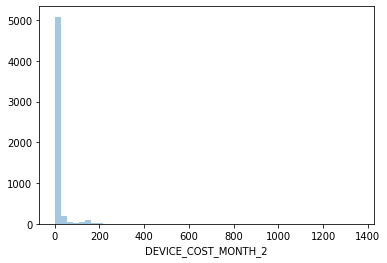

In [26]:
sns.distplot(cleaned_df[selected_columns[11]], kde=False)

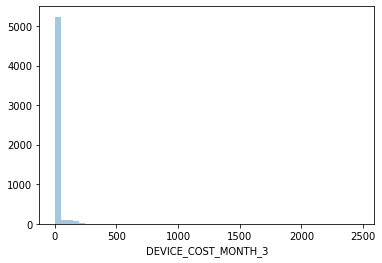

In [27]:
sns.distplot(cleaned_df[selected_columns[12]], kde=False)

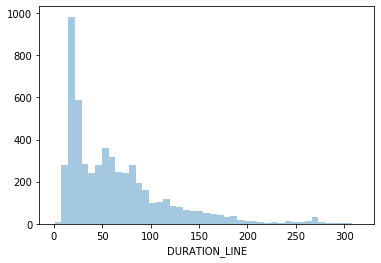

In [28]:
sns.distplot(cleaned_df[selected_columns[13]], kde=False)

[**CODE**] For exponential distribution variables, a "normalization" is usually recommended. Apply **log(x)** to **VOICE_TRAFFIC_MONTH_1** and plot its new distribution.

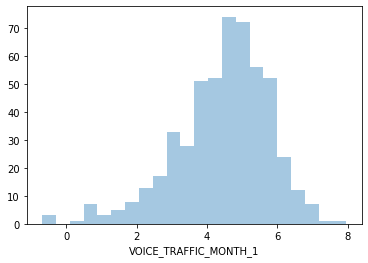

In [29]:
#clean the values that will lead to error
sns.distplot(cleaned_df[selected_columns[4]][(cleaned_df != 0).all(1)].apply(lambda x: np.log(x)), kde=False)

[**REPORT**] Include the plot of the new distribution and compare to the previous one, perhaps placing them side-by-side in your report.

ORIGINAL PLOT:


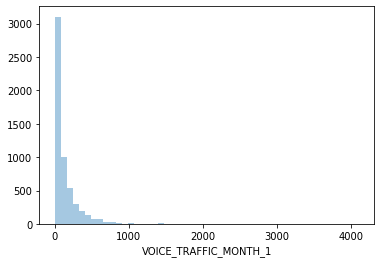

In [30]:
print('ORIGINAL PLOT:')
sns.distplot(cleaned_df[selected_columns[4]], kde=False)

NORMALIZED PLOT:


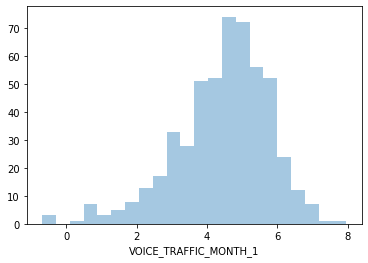

In [31]:
print('NORMALIZED PLOT:')
sns.distplot(cleaned_df[selected_columns[4]][(cleaned_df != 0).all(1)].apply(lambda x: np.log(x)), kde=False)

[**REPORT**] Plot the boxplot for **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1** and **BILLING_MONTH_1**.  From which value can we consider OUTLIERS for each variable?

Tip: use [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) with `kind='box'` to create a boxplot.

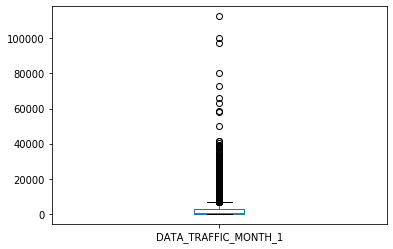

In [32]:
selected_columns = 'DATA_TRAFFIC_MONTH_1 VOICE_TRAFFIC_MONTH_1 BILLING_MONTH_1'.split()
cleaned_df[selected_columns[0]].plot(kind='box')

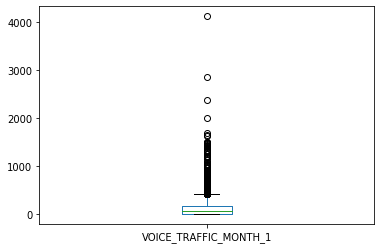

In [33]:
cleaned_df[selected_columns[1]].plot(kind='box')

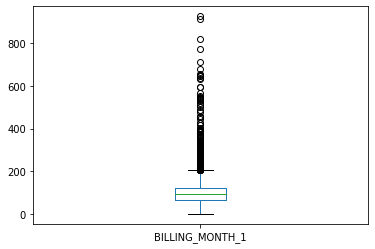

In [34]:
cleaned_df[selected_columns[2]].plot(kind='box')

[**REPORT**] Calculate the correlation between all of traffic attributes (i.e. voice and data), duration line, billing, device cost and device value variables and comment the results. Which are the variables with more and less correlation with respect to the DEVICE_VALUE variable? Why?

Tip: use [pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) to compute a correlation matrix, and [matplotlib.pyplot.matshow](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.matshow.html) to show this graphically.

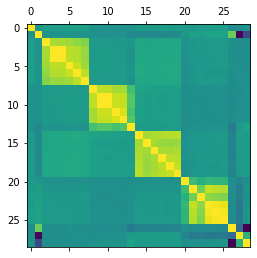

In [35]:
'''
Correlated Data:
DATA_TRAFFIC_MONTH_(1..6)
VOICE_TRAFFIC_MONTH_(1..6) 
BILLING_MONTH_(1..6)
DEVICE_COST_MONTH_(1..6)
'''
plt.matshow(cleaned_df.corr())
plt.show()

## 2.2. Date management and period calculation

[**CODE**] Update the **MONTHS_LAST_DEVICE** value as the difference, in months, between **LAST_DEVICE_CHANGE** and today

Tip: use `date.today()` to obtain the current date, and [pandas.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to convert dates into a numerical representation, to do arithmetic.

In [36]:
difference_in_months = round((pd.to_datetime(date.today()) - pd.to_datetime(cleaned_df['LAST_DEVICE_CHANGE'], format= '%Y%m%d')).dt.days /30)
cleaned_df['MONTHS_LAST_DEVICE'] = difference_in_months
print(cleaned_df['MONTHS_LAST_DEVICE'].head(20))

0     180.0
1      31.0
2     188.0
3      24.0
4       9.0
5      26.0
6      52.0
7      34.0
8      11.0
9      60.0
11     29.0
12    112.0
18     26.0
19     24.0
20     43.0
21     24.0
22     26.0
23     39.0
24     29.0
25     27.0
Name: MONTHS_LAST_DEVICE, dtype: float64


[**CODE**] Update the **DURATION_LINE** value as the difference, in days, between **LINE_ACTIVATION_DATE** and today

In [37]:
difference_in_days = (pd.to_datetime(date.today()) - pd.to_datetime(cleaned_df['LINE_ACTIVATION_DATE'], format= '%Y%m%d')).dt.days
cleaned_df['DURATION_LINE'] = difference_in_days
print(cleaned_df['DURATION_LINE'].head(20))

0     5403
1      914
2     5655
3     2964
4     1937
5      761
6     3345
7     2533
8     2706
9     1771
11     839
12    3348
18    1741
19    1269
20    1269
21    1576
22     754
23    4118
24     839
25    1535
Name: DURATION_LINE, dtype: int64


## 2.3. Standarization of numerical variables

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

[**CODE**] Standardize the **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1**, **BILLING_MONTH_1** and **DEVICE_COST_MONTH_1** columns. Save the results in new colums with the same name follow by **_STAND**. Plot a histogram for each new variable.

Tip: use [StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to standarize a variable.

In [38]:
scaler = StandardScaler()

normalized_dtm1 = cleaned_df[['DATA_TRAFFIC_MONTH_1']].values.astype(float)
dtf1_scaled = scaler.fit_transform(normalized_dtm1)
dtf1_normalized = pd.DataFrame(dtf1_scaled)
cleaned_df['DATA_TRAFFIC_MONTH_1_STAND'] = dtf1_normalized 

normalized_vtm1 = cleaned_df[['VOICE_TRAFFIC_MONTH_1']].values.astype(float)
vtm1_scaled = scaler.fit_transform(normalized_vtm1)
vtm1_normalized = pd.DataFrame(vtm1_scaled)
cleaned_df['VOICE_TRAFFIC_MONTH_1_STAND'] = vtm1_normalized

normalized_bm1 = cleaned_df[['BILLING_MONTH_1']].values.astype(float)
bm1_scaled = scaler.fit_transform(normalized_bm1)
bm1_normalized = pd.DataFrame(bm1_scaled)
cleaned_df['BILLING_MONTH_1_STAND'] = bm1_normalized

normalized_dcm1 = cleaned_df[['DEVICE_COST_MONTH_1']].values.astype(float)
dcm1_scaled = scaler.fit_transform(normalized_dcm1)
dcm_normalized = pd.DataFrame(dcm1_scaled)
cleaned_df['DEVICE_COST_MONTH_1_STAND'] = dcm_normalized

print(cleaned_df.columns)
display(cleaned_df.head())

Index(['PURCHASED_DEVICE', 'DEVICE_VALUE', 'LAST_DEVICE_CHANGE',
       'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
       'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
       'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2',
       'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4',
       'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6', 'BILLING_MONTH_1',
       'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4',
       'BILLING_MONTH_5', 'BILLING_MONTH_6', 'DEVICE_COST_MONTH_1',
       'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4',
       'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6', 'LINE_ACTIVATION_DATE',
       'MONTHS_LAST_DEVICE', 'DURATION_LINE', 'PREVIOUS_DEVICE_MODEL',
       'PREVIOUS_DEVICE_MANUF', 'PREVIOUS_DEVICE_BRAND',
       'DATA_TRAFFIC_MONTH_1_STAND', 'VOICE_TRAFFIC_MONTH_1_STAND',
       'BILLING_MONTH_1_STAND', 'DEVICE_COST_MONTH_1_STAND'],
      dtype='object')


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND,DATA_TRAFFIC_MONTH_1_STAND,VOICE_TRAFFIC_MONTH_1_STAND,BILLING_MONTH_1_STAND,DEVICE_COST_MONTH_1_STAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,20041220.0,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,20041220.0,180.0,5403,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola,-0.365611,-0.414071,-0.208311,0.014776
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,20170405.0,31.0,914,Samsung Galaxy J1 Mini,Samsung Korea,Samsung,-0.405816,-0.632278,-0.816657,-0.109386
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,20040412.0,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,20040412.0,188.0,5655,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola,-0.362268,-0.520683,0.338969,-0.109386
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,20110825.0,24.0,2964,iPhone 6,Apple Inc,Apple,0.288395,0.224610,-0.617182,-0.047305
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,20140617.0,9.0,1937,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros,0.419300,1.261842,0.162432,-0.109386


Normalizing a dataset refers to rescaling each observation (row) to have a length of 1 (called a unit norm or a vector with the length of 1 in linear algebra).

[**CODE**] Normalize the **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1**, **BILLING_MONTH_1** and **DEVICE_COST_MONTH_1** columns. Save the results in new colums with the same name follow by **_NORM**. Plot a histogram for each new variable.


Tip: use [Normalizer()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html) to normalize a variable.

In [39]:
normalizer = Normalizer()
selected_columns = 'DATA_TRAFFIC_MONTH_1 VOICE_TRAFFIC_MONTH_1 BILLING_MONTH_1 DEVICE_COST_MONTH_1'.split()
for element in selected_columns:
    normalized_data = normalizer.transform([cleaned_df[element].values])
    cleaned_df[element + '_NORM'] = normalized_data[0]
display(cleaned_df.head())


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND,DATA_TRAFFIC_MONTH_1_STAND,VOICE_TRAFFIC_MONTH_1_STAND,BILLING_MONTH_1_STAND,DEVICE_COST_MONTH_1_STAND,DATA_TRAFFIC_MONTH_1_NORM,VOICE_TRAFFIC_MONTH_1_NORM,BILLING_MONTH_1_NORM,DEVICE_COST_MONTH_1_NORM
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,20041220.0,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,"Motorola Mobility LLC, a Lenovo Company",Motorola,-0.365611,-0.414071,-0.208311,0.014776,0.000987,0.002670,0.009799,0.001661
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,Samsung Korea,Samsung,-0.405816,-0.632278,-0.816657,-0.109386,0.000493,0.000208,0.005366,0.000000
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,20040412.0,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,"Motorola Mobility LLC, a Lenovo Company",Motorola,-0.362268,-0.520683,0.338969,-0.109386,0.001028,0.001467,0.013787,0.000000
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,Apple Inc,Apple,0.288395,0.224610,-0.617182,-0.047305,0.009026,0.009875,0.006820,0.000831
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,"Motorola Mobility LLC, a Lenovo Company",Outros,0.419300,1.261842,0.162432,-0.109386,0.010636,0.021576,0.012500,0.000000


When your data is comprised of attributes with varying scales, many machine learning algorithms can benefit from rescaling the attributes to all have the same scale. Often this is referred to as normalization and attributes are often rescaled into the range between 0 and 1.

[**CODE**] Rescale the **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1**, **BILLING_MONTH_1** and **DEVICE_COST_MONTH_1** columns. Save the results in new colums with the same name follow by **_RESC**. Plot a histogram for each new variable.

Tip: use [MinMaxScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to rescale a variable between max and min values.

In [40]:
scaler = MinMaxScaler()
selected_columns = 'DATA_TRAFFIC_MONTH_1 VOICE_TRAFFIC_MONTH_1 BILLING_MONTH_1 DEVICE_COST_MONTH_1'.split()
for element in selected_columns:
    scaled_data = scaler.fit_transform(cleaned_df[[element]])
    cleaned_df[element + '_RESC'] = scaled_data
display(cleaned_df)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MONTH_1_STAND,DEVICE_COST_MONTH_1_STAND,DATA_TRAFFIC_MONTH_1_NORM,VOICE_TRAFFIC_MONTH_1_NORM,BILLING_MONTH_1_NORM,DEVICE_COST_MONTH_1_NORM,DATA_TRAFFIC_MONTH_1_RESC,VOICE_TRAFFIC_MONTH_1_RESC,BILLING_MONTH_1_RESC,DEVICE_COST_MONTH_1_RESC
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,20041220.0,465.246730,530.806150,530.806150,781.126460,398.993770,1169.396100,47.500000,...,-0.208311,0.014776,0.000987,0.002670,0.009799,0.001661,0.004138,0.011549,0.093663,0.001863
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.241210,272.255250,272.255250,704.885190,412.716640,365.144410,3.700000,...,-0.816657,-0.109386,0.000493,0.000208,0.005366,0.000000,0.002066,0.000900,0.051295,0.000000
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,20040412.0,484.620360,264.138430,264.138430,348.500730,380.441560,250.735660,26.100000,...,0.338969,-0.109386,0.001028,0.001467,0.013787,0.000000,0.004311,0.006346,0.131778,0.000000
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.460400,836.117070,836.117070,691.556400,146.766600,302.492490,175.700000,...,-0.617182,-0.047305,0.009026,0.009875,0.006820,0.000831,0.037853,0.042718,0.065187,0.000932
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.103000,2659.051500,2659.051500,2435.039300,2053.979500,1553.115000,383.899990,...,0.162432,-0.109386,0.010636,0.021576,0.012500,0.000000,0.044601,0.093338,0.119483,0.000000
5,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,20170901.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,108.500000,...,0.040763,-0.109386,0.000000,0.006098,0.011614,0.000000,0.000000,0.026380,0.111009,0.000000
6,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20150701.0,1127.107900,268.225520,268.225520,320.173950,135.459760,212.066360,370.899990,...,-0.078117,-0.109386,0.002391,0.020846,0.010748,0.000000,0.010026,0.090177,0.102730,0.000000
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.0,20170101.0,1520.205600,2196.574500,2196.574500,1815.700900,2101.681600,3224.283400,206.899990,...,0.229234,0.025122,0.003225,0.011628,0.012987,0.001800,0.013522,0.050304,0.124135,0.002019
8,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,415.0,20181101.0,10789.820000,10423.674000,10423.674000,5188.596700,7379.404300,6789.482900,64.300003,...,0.195755,-0.109386,0.022887,0.003614,0.012743,0.000000,0.095977,0.015633,0.121804,0.000000
9,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20141101.0,793.156010,734.519960,734.519960,156.381210,467.952330,721.303890,2.700000,...,-0.747221,-0.109386,0.001682,0.000152,0.005872,0.000000,0.007055,0.000656,0.056131,0.000000


## 2.4. Convert categorical columns to dummy binary variables

Categorical variables transformation is a key stage before any machine learning model.

[**CODE**] Convert **PREVIOUS_DEVICE_BRAND** to a new integer variable with name **PREVIOUS_DEVICE_BRAND_INTEGER_ENCOD** and dummy binary variables. Convert **PREVIOUS_DEVICE_MODEL** to a new integer variable with name **PREVIOUS_DEVICE_MODEL_INTEGER_ENCOD** and dummy binary variables.

Tip: use [LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to transform a categorical variable to integer values. Use [OneHotEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) after integer encoding (i.e. [LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)) to transform a categorical variable into integer values and finally into a one hot value.

In [41]:
le = LabelEncoder()
selected_columns = 'PREVIOUS_DEVICE_BRAND PREVIOUS_DEVICE_MODEL'.split()

for element in selected_columns:
    le.fit(cleaned_df[element])
    transformed_labels = le.transform(cleaned_df[element])
    cleaned_df[element + '_INTEGER_ENCOD'] = transformed_labels
display(cleaned_df)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DATA_TRAFFIC_MONTH_1_NORM,VOICE_TRAFFIC_MONTH_1_NORM,BILLING_MONTH_1_NORM,DEVICE_COST_MONTH_1_NORM,DATA_TRAFFIC_MONTH_1_RESC,VOICE_TRAFFIC_MONTH_1_RESC,BILLING_MONTH_1_RESC,DEVICE_COST_MONTH_1_RESC,PREVIOUS_DEVICE_BRAND_INTEGER_ENCOD,PREVIOUS_DEVICE_MODEL_INTEGER_ENCOD
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,20041220.0,465.246730,530.806150,530.806150,781.126460,398.993770,1169.396100,47.500000,...,0.000987,0.002670,0.009799,0.001661,0.004138,0.011549,0.093663,0.001863,2,262
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.241210,272.255250,272.255250,704.885190,412.716640,365.144410,3.700000,...,0.000493,0.000208,0.005366,0.000000,0.002066,0.000900,0.051295,0.000000,4,418
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,20040412.0,484.620360,264.138430,264.138430,348.500730,380.441560,250.735660,26.100000,...,0.001028,0.001467,0.013787,0.000000,0.004311,0.006346,0.131778,0.000000,2,252
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.460400,836.117070,836.117070,691.556400,146.766600,302.492490,175.700000,...,0.009026,0.009875,0.006820,0.000831,0.037853,0.042718,0.065187,0.000932,0,542
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.103000,2659.051500,2659.051500,2435.039300,2053.979500,1553.115000,383.899990,...,0.010636,0.021576,0.012500,0.000000,0.044601,0.093338,0.119483,0.000000,3,143
5,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,20170901.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,108.500000,...,0.000000,0.006098,0.011614,0.000000,0.000000,0.026380,0.111009,0.000000,3,114
6,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20150701.0,1127.107900,268.225520,268.225520,320.173950,135.459760,212.066360,370.899990,...,0.002391,0.020846,0.010748,0.000000,0.010026,0.090177,0.102730,0.000000,2,259
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.0,20170101.0,1520.205600,2196.574500,2196.574500,1815.700900,2101.681600,3224.283400,206.899990,...,0.003225,0.011628,0.012987,0.001800,0.013522,0.050304,0.124135,0.002019,0,542
8,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,415.0,20181101.0,10789.820000,10423.674000,10423.674000,5188.596700,7379.404300,6789.482900,64.300003,...,0.022887,0.003614,0.012743,0.000000,0.095977,0.015633,0.121804,0.000000,0,542
9,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20141101.0,793.156010,734.519960,734.519960,156.381210,467.952330,721.303890,2.700000,...,0.001682,0.000152,0.005872,0.000000,0.007055,0.000656,0.056131,0.000000,4,422


## 2.5. Feature generation

In the current dataset we have a historic of 6 months for data traffic, voice traffic, billing and device cost. Feature engineering consists of creating new attributes from the current dataset that can help us to improve the performance of a ulterior model.

[**REPORT**] For the 6 months of **DATA_TRAFFIC**, **VOICE_TRAFFIC**, **BILLING** and **DEVICE_COST** calculate new columns or attributes with the mean, maximum, minimum, range (i.e. difference between maximum and minimum) for each purchase.

In [42]:
selected_columns_aux = 'DATA_TRAFFIC_MONTH VOICE_TRAFFIC_MONTH BILLING_MONTH DEVICE_COST_MONTH'.split()
selected_columns = []

for element in selected_columns_aux:
    for i in range(1,7):
        aux = element + '_' + str(i)
        selected_columns.append(aux)

cleaned_df['DATA_TRAFFIC_MONTH_MEAN'] = cleaned_df[selected_columns[0:5]].mean(axis=1)
cleaned_df['VOICE_TRAFFIC_MONTH_MEAN'] = cleaned_df[selected_columns[6:11]].mean(axis=1)
cleaned_df['BILLING_MONTH_MEAN'] = cleaned_df[selected_columns[12:17]].mean(axis=1)
cleaned_df['DEVICE_COST_MONTH_MEAN'] = cleaned_df[selected_columns[18:23]].mean(axis=1)

cleaned_df['DATA_TRAFFIC_MONTH_MAX'] = cleaned_df[selected_columns[0:5]].max(axis=1)
cleaned_df['VOICE_TRAFFIC_MONTH_MAX'] = cleaned_df[selected_columns[6:11]].max(axis=1)
cleaned_df['BILLING_MONTH_MAX'] = cleaned_df[selected_columns[12:17]].max(axis=1)
cleaned_df['DEVICE_COST_MONTH_MAX'] = cleaned_df[selected_columns[18:23]].max(axis=1)

cleaned_df['DATA_TRAFFIC_MONTH_MIN'] = cleaned_df[selected_columns[0:5]].min(axis=1)
cleaned_df['VOICE_TRAFFIC_MONTH_MIN'] = cleaned_df[selected_columns[6:11]].min(axis=1)
cleaned_df['BILLING_MONTH_MIN'] = cleaned_df[selected_columns[12:17]].min(axis=1)
cleaned_df['DEVICE_COST_MONTH_MIN'] = cleaned_df[selected_columns[18:23]].min(axis=1)

cleaned_df['DATA_TRAFFIC_MONTH_RANGE'] = cleaned_df['DATA_TRAFFIC_MONTH_MAX'] - cleaned_df['DATA_TRAFFIC_MONTH_MIN']
cleaned_df['VOICE_TRAFFIC_MONTH_RANGE'] = cleaned_df['VOICE_TRAFFIC_MONTH_MAX'] - cleaned_df['VOICE_TRAFFIC_MONTH_MIN']
cleaned_df['BILLING_MONTH_RANGE'] = cleaned_df['BILLING_MONTH_MAX'] - cleaned_df['BILLING_MONTH_MIN'] 
cleaned_df['DEVICE_COST_MONTH_RANGE'] = cleaned_df['DEVICE_COST_MONTH_MAX'] - cleaned_df['DEVICE_COST_MONTH_MIN']

display(cleaned_df)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MONTH_MAX,DEVICE_COST_MONTH_MAX,DATA_TRAFFIC_MONTH_MIN,VOICE_TRAFFIC_MONTH_MIN,BILLING_MONTH_MIN,DEVICE_COST_MONTH_MIN,DATA_TRAFFIC_MONTH_RANGE,VOICE_TRAFFIC_MONTH_RANGE,BILLING_MONTH_RANGE,DEVICE_COST_MONTH_RANGE
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,20041220.0,465.246730,530.806150,530.806150,781.126460,398.993770,1169.396100,47.500000,...,107.93,12.0,398.993770,21.799999,85.00,12.0,382.132690,57.899998,22.93,0.0
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.241210,272.255250,272.255250,704.885190,412.716640,365.144410,3.700000,...,50.80,0.0,232.241210,0.500000,47.00,0.0,472.643980,4.200000,3.80,0.0
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,20040412.0,484.620360,264.138430,264.138430,348.500730,380.441560,250.735660,26.100000,...,129.14,0.0,264.138430,26.100000,113.77,0.0,220.481930,192.600000,15.37,0.0
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.460400,836.117070,836.117070,691.556400,146.766600,302.492490,175.700000,...,60.93,6.0,146.766600,119.000000,55.99,6.0,4108.693800,97.300000,4.94,0.0
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.103000,2659.051500,2659.051500,2435.039300,2053.979500,1553.115000,383.899990,...,110.69,0.0,2053.979500,0.000000,107.99,0.0,2960.123500,383.899990,2.70,0.0
5,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,20170901.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,108.500000,...,102.84,0.0,0.000000,0.000000,99.99,0.0,0.000000,108.500000,2.85,0.0
6,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20150701.0,1127.107900,268.225520,268.225520,320.173950,135.459760,212.066360,370.899990,...,95.77,0.0,135.459760,315.700010,90.99,0.0,991.648140,124.799990,4.78,0.0
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.0,20170101.0,1520.205600,2196.574500,2196.574500,1815.700900,2101.681600,3224.283400,206.899990,...,186.31,13.0,1520.205600,206.899990,115.00,13.0,676.368900,344.000030,71.31,0.0
8,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,415.0,20181101.0,10789.820000,10423.674000,10423.674000,5188.596700,7379.404300,6789.482900,64.300003,...,112.84,0.0,5188.596700,0.000000,109.99,0.0,5601.223300,64.300003,2.85,0.0
9,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20141101.0,793.156010,734.519960,734.519960,156.381210,467.952330,721.303890,2.700000,...,52.00,0.0,156.381210,2.700000,51.73,0.0,636.774800,3.400000,0.27,0.0


[**CODE**] Create a synthetic variable that measures the ratio between **DEVICE_COST_MEAN** and **BILLING_MEAN**. Which is its distribution?

count    5473.000000
mean        0.130242
std         0.617976
min         0.000000
25%         0.000000
50%         0.000000
75%         0.068899
max        33.895208
Name: DEVICE_COST_BILLING_RATIO, dtype: float64


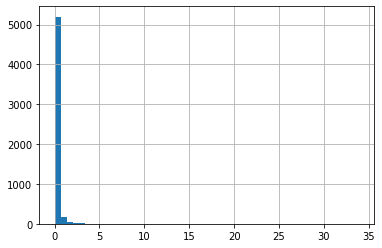

In [43]:
cleaned_df['DEVICE_COST_BILLING_RATIO'] = cleaned_df['DEVICE_COST_MONTH_MEAN'] / cleaned_df['BILLING_MONTH_MEAN']
print(cleaned_df['DEVICE_COST_BILLING_RATIO'].describe())
cleaned_df['DEVICE_COST_BILLING_RATIO'].hist(bins= 50)

'''
The distribution is a Poison Distribution around 0.1
'''

## 2.6. Text parsing/processing

In machine learning, text processing is a very useful tool that can be used to improve datasets. In some use cases, for instance customer care applications using digital channels as Whatsapp, Facebook, etc..., data scientist teams mainly works with text data.

One of the text processing technique is to extract concrete words or tokens from a sentence or documents. Regex is an open source tool with plenty of utilities to extract data from patterns.

[**CODE**] The **PURCHASED_DEVICE** is a variable that is formed by a "**device_code**"+"**_**"+"**manufacture name**"+"**  **"+"**device model**". Applying text processing techniques to **PURCHASED_DEVICE** variable, create 3 new columns with the following variables names: **PURCHASED_DEVICE_CODE**, **PURCHASED_DEVICE_MANUFACTURE** and **PURCHASED_DEVICE_MODEL**.

Tip: use [str.split](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html) to separate a string into several parts.

In [57]:
array_df = cleaned_df['PURCHASED_DEVICE'].array
device_code = []
device_manufacture = []
device_model = []

for element in cleaned_df['PURCHASED_DEVICE'].array:
    device_code.append(element.split()[0].split('_')[0])
    device_manufacture.append(element.split()[0].split('_')[1])
    device_model.append(element.split()[1])

cleaned_df['PURCHASED_DEVICE_CODE'] = device_code
cleaned_df['PURCHASED_DEVICE_MANUFACTURE'] = device_manufacture
cleaned_df['PURCHASED_DEVICE_MODEL'] = device_model
    
display(cleaned_df)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MONTH_MIN,DEVICE_COST_MONTH_MIN,DATA_TRAFFIC_MONTH_RANGE,VOICE_TRAFFIC_MONTH_RANGE,BILLING_MONTH_RANGE,DEVICE_COST_MONTH_RANGE,DEVICE_COST_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURE,PURCHASED_DEVICE_MODEL
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,20041220.0,465.246730,530.806150,530.806150,781.126460,398.993770,1169.396100,47.500000,...,85.00,12.0,382.132690,57.899998,22.93,0.0,0.132042,TGLG29162000,LG,X210BMW
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.241210,272.255250,272.255250,704.885190,412.716640,365.144410,3.700000,...,47.00,0.0,472.643980,4.200000,3.80,0.0,0.000000,TGLG29162000,LG,X210BMW
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,20040412.0,484.620360,264.138430,264.138430,348.500730,380.441560,250.735660,26.100000,...,113.77,0.0,220.481930,192.600000,15.37,0.0,0.000000,TGMO35912000,MOTOROLA,XT1922
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.460400,836.117070,836.117070,691.556400,146.766600,302.492490,175.700000,...,55.99,6.0,4108.693800,97.300000,4.94,0.0,0.102281,TGLG29162000,LG,X210BMW
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.103000,2659.051500,2659.051500,2435.039300,2053.979500,1553.115000,383.899990,...,107.99,0.0,2960.123500,383.899990,2.70,0.0,0.000000,TGMO35912000,MOTOROLA,XT1922
5,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,20170901.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,108.500000,...,99.99,0.0,0.000000,108.500000,2.85,0.0,0.000000,TGLG29162000,LG,X210BMW
6,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20150701.0,1127.107900,268.225520,268.225520,320.173950,135.459760,212.066360,370.899990,...,90.99,0.0,991.648140,124.799990,4.78,0.0,0.000000,TGLG29162000,LG,X210BMW
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.0,20170101.0,1520.205600,2196.574500,2196.574500,1815.700900,2101.681600,3224.283400,206.899990,...,115.00,13.0,676.368900,344.000030,71.31,0.0,0.091130,DGAP068C2000,APPLE,IPHONE
8,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,415.0,20181101.0,10789.820000,10423.674000,10423.674000,5188.596700,7379.404300,6789.482900,64.300003,...,109.99,0.0,5601.223300,64.300003,2.85,0.0,0.000000,TGMO35912000,MOTOROLA,XT1922
9,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20141101.0,793.156010,734.519960,734.519960,156.381210,467.952330,721.303890,2.700000,...,51.73,0.0,636.774800,3.400000,0.27,0.0,0.000000,TGLG29162000,LG,X210BMW


[**REPORT**] Create a table with the number of devices per manufacturer in **PURCHASED_DEVICE_MANUFACTURE** vs **PREVIOUS_DEVICE_MANUF**.

In [70]:
previous_device_df = cleaned_df['PREVIOUS_DEVICE_BRAND'].value_counts().rename(index={'Apple':'APPLE', 'Motorola':'MOTOROLA', 'Samsung':'SAMSUNG'})
actual_device_df = cleaned_df['PURCHASED_DEVICE_MANUFACTURE'].value_counts()
result = pd.concat([previous_device_df, actual_device_df], axis=1)
display(result)

,PREVIOUS_DEVICE_BRAND,PURCHASED_DEVICE_MANUFACTURE
ALCATEL,NaN,230.0
APPLE,1404.0,426.0
ASUS,NaN,2.0
LG,464.0,3245.0
MOTOROLA,586.0,595.0
Outros,1393.0,NaN
SAMSUNG,1673.0,1022.0


## 2.6. Splitting and sampling a dataset

Splitting and sampling dataset are techniques that distribute the original dataset in n-parts. One of the most interesting application of these tools is to separate the dataset to train and test a machine learning model. Meanwhile sampling guarantees same type of data (i.e. distributions), splitting will separate the dataset with the ratio we need. Usually, 80%-20% or 70%-30% splitting ratios are the most common used.

Once again, Sklearn library helps to us to cover this necessity: Sklearn provides the function **train_test_split** to  split and sample a dataset in two parts.

[**CODE**] Split the dataset in two separate datasets: one with 80% of the samples and the other with 20% of registers

Tip: you can use the [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split into training and testing.

In [73]:
dummy_y = ['dummy']*cleaned_df.shape[0]
X_train, X_test, y_train, y_test = train_test_split(cleaned_df, dummy_y, test_size=0.20, random_state=42)

display(X_train.head(10), X_test.head(10))


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MONTH_MIN,DEVICE_COST_MONTH_MIN,DATA_TRAFFIC_MONTH_RANGE,VOICE_TRAFFIC_MONTH_RANGE,BILLING_MONTH_RANGE,DEVICE_COST_MONTH_RANGE,DEVICE_COST_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURE,PURCHASED_DEVICE_MODEL
7805,TGSA31762000_SAMSUNG N9600 SMART PRETO PPB/PI1...,4353.0,20170301.0,950.242800,1121.735200,1121.735200,801.45520,1043.141600,495.993470,167.500000,...,71.89,67.0,320.280000,207.700010,75.81,0.0,0.750919,TGSA31762000,SAMSUNG,N9600
3603,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,273.0,20171101.0,2148.976600,914.378970,914.378970,846.92737,1319.635300,1067.417000,396.899990,...,77.00,9.0,1302.049230,122.500000,6.79,0.0,0.113145,TGLG29162000,LG,X210BMW
8395,TGLG29462000_LG X410BCW SMARTPHONE PRETO PPB/P...,441.0,20170801.0,1921.568400,4198.516100,4198.516100,3238.26560,3064.939700,3631.025600,292.700010,...,92.69,0.0,2276.947700,156.500000,1.94,0.0,0.000000,TGLG29462000,LG,X410BCW
1908,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,561.0,20091029.0,248.214770,421.448210,421.448210,108.13270,94.100975,77.687149,123.800000,...,55.16,0.0,327.347235,68.399990,23.58,0.0,0.000000,TGLG29162000,LG,X210BMW
7362,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,20021125.0,1470.638700,474.575290,474.575290,2520.55000,2500.621100,7298.285600,264.200010,...,91.49,0.0,2045.974710,63.099990,0.00,0.0,0.000000,TGLG29162000,LG,X210BMW
9788,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,535.0,19970101.0,10277.040000,12897.332000,12897.332000,14447.51800,6948.795900,5618.760300,89.199997,...,92.00,0.0,7498.722100,63.899998,28.19,0.0,0.000000,TGMO35912000,MOTOROLA,XT1922
3588,TGAL03462000_ALCATEL 5033J SMART PRETO,177.0,20170701.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,27.06,0.0,0.000000,0.000000,0.00,0.0,0.000000,TGAL03462000,ALCATEL,5033J
4960,TGSA31564000_SAMSUNG J810M SMART PRETO PPB/PI3...,1041.0,20171001.0,261.930050,220.156680,220.156680,286.38199,1824.579700,2151.705800,125.100000,...,142.00,10.0,1604.423020,150.699990,6.09,0.0,0.069585,TGSA31564000,SAMSUNG,J810M
9646,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,20171201.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,231.399990,...,115.99,17.0,0.000000,134.200010,231.31,0.0,0.100954,TGLG29162000,LG,X210BMW
4420,TGMO362C2000_MOTOROLA XT1944 SMARTPHONE PLATINUM,465.0,20170901.0,35.755508,82.672379,82.672379,1148.41780,979.353150,171.218750,107.100000,...,72.99,0.0,1112.662292,39.600000,0.00,0.0,0.000000,TGMO362C2000,MOTOROLA,XT1944


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MONTH_MIN,DEVICE_COST_MONTH_MIN,DATA_TRAFFIC_MONTH_RANGE,VOICE_TRAFFIC_MONTH_RANGE,BILLING_MONTH_RANGE,DEVICE_COST_MONTH_RANGE,DEVICE_COST_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURE,PURCHASED_DEVICE_MODEL
3181,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,321.0,20150701.0,3.927774,1068.94960,1068.94960,521.69318,12.938594,938.09717,0.0,...,73.00,0.00,1065.021826,0.000000,0.96,0.0,0.000000,TGLG29162000,LG,X210BMW
7518,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,537.0,20180301.0,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.0,...,44.99,0.62,0.000000,3.100000,0.00,0.0,0.013781,TGLG29162000,LG,X210BMW
5126,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,273.0,20170701.0,0.000000,5544.59380,5544.59380,6397.43020,6925.278800,0.00000,98.5,...,113.14,0.00,6925.278800,94.499997,0.69,0.0,0.000000,TGLG29162000,LG,X210BMW
9753,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3385.0,20170601.0,1178.666600,941.91809,941.91809,948.63074,1251.714000,2258.55930,199.0,...,205.35,18.00,309.795910,165.500000,76.66,0.0,0.077844,DGAP068C2000,APPLE,IPHONE
3654,TGSA32062000_SAMSUNG J415G SMART PRETO PPB/PI1...,585.0,20170201.0,3078.599400,5607.42680,5607.42680,2813.72390,8491.916000,5951.34180,41.5,...,59.00,0.00,5678.192100,35.899997,0.00,20.0,0.271186,TGSA32062000,SAMSUNG,J415G
6387,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,273.0,20161001.0,1043.681300,1299.40500,1299.40500,945.64825,1367.494600,602.25818,627.5,...,91.34,0.00,421.846350,149.700010,69.41,0.0,0.000000,TGLG29162000,LG,X210BMW
4202,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,321.0,20110803.0,3598.986600,4092.06930,4092.06930,2638.20780,8504.417000,6317.38570,216.8,...,69.38,0.00,5866.209200,48.099990,25.32,0.0,0.000000,TGLG29162000,LG,X210BMW
2930,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,177.0,20170801.0,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.0,...,64.99,0.62,0.000000,0.000000,0.00,0.0,0.009540,TGLG29162000,LG,X210BMW
5597,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,273.0,20151015.0,3161.501700,506.14734,506.14734,201.49246,531.973690,1801.46920,4.3,...,44.99,0.00,2960.009240,224.400000,48.20,0.0,0.000000,TGLG29162000,LG,X210BMW
8408,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,321.0,20171201.0,0.007812,0.00000,0.00000,0.00000,0.000000,0.00000,18.1,...,50.99,171.00,0.007812,16.799999,0.00,13.0,3.455580,TGLG29162000,LG,X210BMW


[**REPORT**] Create a table and compare the main statistics (mean, standard deviation, min, max, 25%, 50%, 75%) of **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1** and **BILLING_MONTH_1** in both datasets. Are they similar?

In [78]:
print('DATA_TRAFFIC_MONTH_1')
display(X_train['DATA_TRAFFIC_MONTH_1'].describe(), X_test['DATA_TRAFFIC_MONTH_1'].describe())

print('VOICE_TRAFFIC_MONTH_1')
display(X_train['VOICE_TRAFFIC_MONTH_1'].describe(), X_test['VOICE_TRAFFIC_MONTH_1'].describe())

print('BILLING_MONTH_1')
display(X_train['BILLING_MONTH_1'].describe(), X_test['BILLING_MONTH_1'].describe())

DATA_TRAFFIC_MONTH_1


count      4416.000000
mean       2612.943872
std        5847.874878
min           0.000000
25%           0.000000
50%         406.788250
75%        2705.734725
max      112421.170000
Name: DATA_TRAFFIC_MONTH_1, dtype: float64

count     1104.000000
mean      2468.729946
std       5584.291835
min          0.000000
25%          0.000000
50%        441.795230
75%       2811.977625
max      97074.617000
Name: DATA_TRAFFIC_MONTH_1, dtype: float64

VOICE_TRAFFIC_MONTH_1


count    4416.000000
mean      133.202899
std       209.101493
min         0.000000
25%         9.675000
50%        62.000000
75%       171.324998
max      4113.000000
Name: VOICE_TRAFFIC_MONTH_1, dtype: float64

count    1104.000000
mean      120.263044
std       162.762028
min         0.000000
25%        10.300000
50%        64.700001
75%       161.750007
max      1405.100000
Name: VOICE_TRAFFIC_MONTH_1, dtype: float64

BILLING_MONTH_1


count    4416.000000
mean      100.699744
std        65.790535
min         0.000000
25%        65.107500
50%        92.990000
75%       121.140000
max       926.410000
Name: BILLING_MONTH_1, dtype: float64

count    1104.000000
mean       98.251168
std        59.180381
min         0.000000
25%        62.492500
50%        92.990000
75%       121.140000
max       712.870000
Name: BILLING_MONTH_1, dtype: float64

# 3. Deliver

Deliver:

* A zip file containing your notebook (.ipynb file) with all the [**CODE**] parts implemented.
* A 4-pages PDF report including all parts of this notebook marked with "[**REPORT**]". If some table is too large to fit the report, summarize it by, for instance, including in the report only the first few rows.

The report should end with the following statement: **I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.**